# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [87]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
from scipy import stats
%matplotlib inline

import seaborn as sns

### Step 2: Read in your data set 

In [56]:
#Read in data from source 
df_raw = pd.read_csv("admissions.csv")
print df_raw.head(5)

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [57]:
#df_raw.count()
len(df_raw)

400

Answer: In this dataset are 400 observations (i.e. rows)

#### Question 2. Create a summary table

In [58]:
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


In [59]:
df_raw.info()
df_raw.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
admit       400 non-null int64
gre         398 non-null float64
gpa         398 non-null float64
prestige    399 non-null float64
dtypes: float64(3), int64(1)
memory usage: 12.6 KB


admit         int64
gre         float64
gpa         float64
prestige    float64
dtype: object

#### Question 3. Why would GRE have a larger STD than GPA?

Answer: A variable with a mean value up 500 is likely to have a larger STD than a variable with a mean value less than 100. 

#### Question 4. Drop data points with missing data


In [60]:
data_clean = df_raw.dropna()
len(data_clean)

397

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

In [109]:
data_clean.isnull().count()

admit       397
gre         397
gpa         397
prestige    397
dtype: int64

#### Question 6. Create box plots for GRE and GPA

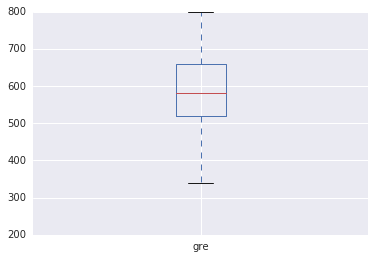

In [62]:
#boxplot 1 (GRE)

data_clean.gre.plot(kind='box')

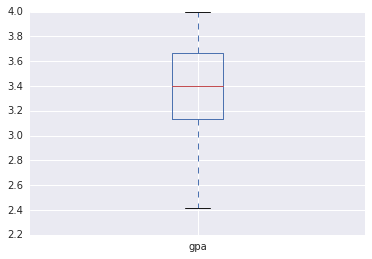

In [63]:
#boxplot 2 (GPA)

data_clean.gpa.plot(kind='box')

#### Question 7. What do this plots show?

Answer: 

- Minimum and maximum of all of the data
- Mean of the data
- Quartiles (25%, 50%, 75%)
- Outliers
- Range
- Skewness pattern

#### Question 8. Describe each distribution 

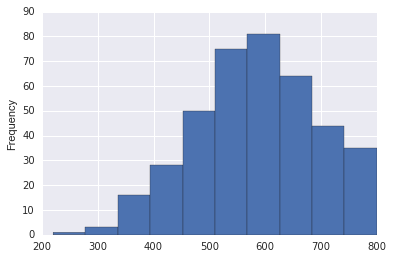

In [64]:
# plot 1 (GRE)

data_clean.gre.plot(kind='hist', bins=10)

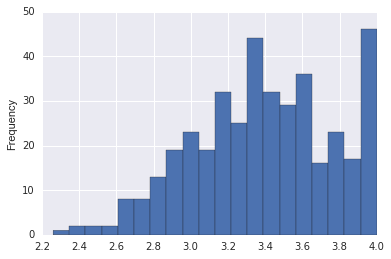

In [65]:
# plot 2 (GPA)

data_clean.gpa.plot(kind='hist', bins=20)

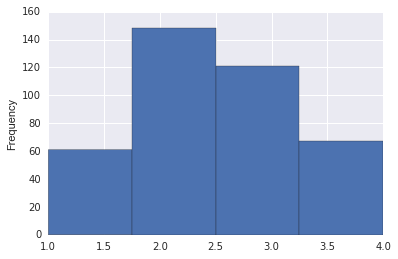

In [66]:
# plot 3 (prestige)

data_clean.prestige.plot(kind='hist', bins=4)

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

In [85]:
# Answer: No
# Skewness values are not zero. This dataset contains symmetric data (skewness near zero).   
# Check skewness
greskew = data_clean["gre"].skew()  
gpaskew = data_clean["gpa"].skew()  
prestigeskew = data_clean["prestige"].skew()  

print "skewed left :"
print greskew
print "skewed left :"
print gpaskew
print "skewed right :"
print prestigeskew

skewed left :
-0.146046988216
skewed left :
-0.216888932969
skewed right :
0.0865055528971


#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: Yes. According to the skew() outputs, the data in this dataset does not have a normal distribution. 
The Box-Cox transformation is an option of correction.

#### Question 11. Which of our variables are potentially colinear? 

In [108]:
# create a correlation matrix for the data
data_clean.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


#### Question 12. What did you find?

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: 

I would use Chi-Squared Test of independence to explore the association between the two categorical variables: Admissions and Prestige.

#### Question 14. What is your hypothesis? 

Answer: 

H0: The two variables are independent
H1: The two variables are dependent (associated)